# initial steps
### download the annual reports from
https://mrv.emsa.europa.eu/#public/emission-report
### further information
https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:32015R0757

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

In [3]:
df = pd.read_excel('data/2018-v267-24062022-EU MRV Publication of information.xlsx',
                   header=[0,1,2])
df.head()
# multi-index col ignores index_col=None. it always picks first col as the index
# solution: flatten the multi-index

Ship                     Ship                                        \
           Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
IMO Number               Name          Ship type   Reporting Period   
5383304               ASTORIA     Passenger ship               2018   
6417097            MARCO POLO     Passenger ship               2018   
6511128            RED STAR 1        Ro-pax ship               2018   
6602898         OCEAN MAJESTY     Passenger ship               2018   
6703343              EQUALITY   Other ship types               2018   

Ship                                                                     \
               Unnamed: 3_level_1 Unnamed: 4_level_1 Unnamed: 5_level_1   
IMO Number   Technical efficiency   Port of Registry          Home Port   
5383304            Not Applicable                NaN                NaN   
6417097            Not Applicable                NaN                NaN   
6511128     EIV (45.57 gCO₂/t·nm)                NaN                NaN   
6602898     EIV (31.73 gCO₂/t·nm)            Madeira                NaN   
6703343            Not Applicable             Beirut                NaN   

Ship                                         DoC                     \
           Unnamed: 6_level_1 Unnamed: 7_level_1 Unnamed: 8_level_1   
IMO Number          Ice Class     DoC issue date    DoC expiry date   
5383304                   NaN         05/02/2019         30/06/2020   
6417097                    IC         05/02/2019         30/06/2020   
6511128                   NaN         30/04/2019         30/06/2020   
6602898                   NaN         06/05/2019         30/06/2020   
6703343                   NaN         30/06/2019         30/06/2020   

Ship                 Verifier  \
           Unnamed: 9_level_1   
IMO Number    Verifier Number   
5383304                   NaN   
6417097                   NaN   
6511128                   NaN   
6602898                   NaN   
6703343                   NaN   

Ship                                 ...                             \
                                     ...                              
IMO Number                           ...                              
5383304                              ...                              
6417097                              ...                              
6511128                              ...                              
6602898                              ...                              
6703343                              ...                              

Ship                                                                  Voluntary reporting  \
                                               Average energy efficiency on Laden Voyages   
IMO Number Fuel consumption per transport work (pax) on laden voyages [g / pax · n miles]   
5383304                                                   NaN                               
6417097                                                   NaN                               
6511128                                                   NaN                               
6602898                                                   NaN                               
6703343                                                   NaN                               

Ship                                                                                                \
                                                                                                     
IMO Number Fuel consumption per transport work (freight) on laden voyages [g / m tonnes · n miles]   
5383304                                                   NaN                                        
6417097                                                   NaN                                        
6511128                                                   NaN                                        
6602898                                                   NaN         

In [5]:
col_names = [
   "ship_IMO_Number",
   "ship_Name",
   "ship_type",
   "ship_Reporting_Period",
   "ship_Technical_efficiency",
   "ship_Port_of_Registry",
   "ship_Home_Port",
   "ship_Ice_Class",
   "DoC_issue_date",
   "DoC_expiry_date",
   "Verifier_Number",
   "Verifier_Name",
   "Verifier_NAB",
   "Verifier_Address",
   "Verifier_City",
   "Verifier_Accreditation_number",
   "Verifier_Country",
   "Monitoring_method_A",
   "Monitoring_method_B",
   "Monitoring_method_C",
   "Monitoring_method_D",
   "Total_fuel_consumption_[m_tonnes]",
   "Fuel_consumptions_assigned_to_On_laden_[m_tonnes]",
   "Total_CO2_emissions_[m_tonnes]",
   "CO2_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes]",
   "CO2_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes]",
   "CO2_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes]",
   "CO2_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes]",
   "CO2_emissions_assigned_to_Passenger_transport_[m_tonnes]",
   "CO2_emissions_assigned_to_Freight_transport_[m_tonnes]",
   "CO2_emissions_assigned_to_On_laden_[m_tonnes]",
   "Annual_Total_time_spent_at_sea_[hours]",
   "Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]",
   "Annual_average_Fuel_consumption_per_transport_work_(mass)_[g_/_m_tonnes_·_n_miles]",
   "Annual_average_Fuel_consumption_per_transport_work_(volume)_[g_/_m³_·_n_miles]",
   "Annual_average_Fuel_consumption_per_transport_work_(dwt)_[g_/_dwt_carried_·_n_miles]",
   "Annual_average_Fuel_consumption_per_transport_work_(pax)_[g_/_pax_·_n_miles]",
   "Annual_average_Fuel_consumption_per_transport_work_(freight)_[g_/_m_tonnes_·_n_miles]",
   "Annual_average_CO2_emissions_per_distance_[kg_CO2_/_n_mile]",
   "Annual_average_CO2_emissions_per_transport_work_(mass)_[g_CO2_/_m_tonnes_·_n_miles]",
   "Annual_average_CO2_emissions_per_transport_work_(volume)_[g_CO2_/_m³_·_n_miles]",
   "Annual_average_CO2_emissions_per_transport_work_(dwt)_[g_CO2_/_dwt_carried_·_n_miles]",
   "Annual_average_CO2_emissions_per_transport_work_(pax)_[g_CO2_/_pax_·_n_miles]",
   "Annual_average_CO2_emissions_per_transport_work_(freight)_[g_CO2_/_m_tonnes_·_n_miles]",
   "Distance_Through_ice_[n_miles]",
   "Total_time_spent_at_sea_[hours]",  # is this redundant??
   "Total_time_spent_at_sea_through_ice_[hours]",
   "Fuel_consumption_per_distance_on_laden_voyages_[kg_/_n_mile]",
   "Fuel_consumption_per_transport_work_(mass)_on_laden_voyages_[g_/_m_tonnes_·_n_miles]",
   "Fuel_consumption_per_transport_work_(volume)_on_laden_voyages_[g_/_m³_·_n_miles]",
   "Fuel_consumption_per_transport_work_(dwt)_on_laden_voyages_[g_/_dwt_carried_·_n_miles]",
   "Fuel_consumption_per_transport_work_(pax)_on_laden_voyages_[g_/_pax_·_n_miles]",
   "Fuel_consumption_per_transport_work_(freight)_on_laden_voyages_[g_/_m_tonnes_·_n_miles]",
   "CO2_emissions_per_distance_on_laden_voyages_[kg_CO2_/_n_mile]",
   "CO2_emissions_per_transport_work_(mass)_on_laden_voyages_[g_CO2_/_m_tonnes_·_n_miles]",
   "CO2_emissions_per_transport_work_(volume)_on_laden_voyages_[g_CO2_/_m³_·_n_miles]",
   "CO2_emissions_per_transport_work_(dwt)_on_laden_voyages_[g_CO2_/_dwt_carried_·_n_miles]",
   "CO2_emissions_per_transport_work_(pax)_on_laden_voyages_[g_CO2_/_pax_·_n_miles]",
   "CO2_emissions_per_transport_work_(freight)_on_laden_voyages_[g_CO2_/_m_tonnes_·_n_miles]",
   "notes",
   "Average_density_of_the_cargo_transported_[m_tonnes_/_m³]",
]

In [6]:
df18 = pd.read_excel('data/2018-v267-24062022-EU MRV Publication of information.xlsx',
                   header=2, names=col_names)
df18['year'] = 2018

df19 = pd.read_excel('data/2019-v210-03092022-EU MRV Publication of information.xlsx',
                   header=2, names=col_names)
df19['year'] = 2019

df20 = pd.read_excel('data/2020-v174-20092022-EU MRV Publication of information.xlsx',
                   header=2, names=col_names)
df20['year'] = 2020

df21 = pd.read_excel('data/2021-v63-24092022-EU MRV Publication of information.xlsx',
                   header=2, names=col_names)
df21['year'] = 2021

df = pd.concat([df18,df19,df20,df21],ignore_index=True)

In [7]:
# amount of cells with 'Division by zero!' as value
(df == 'Division by zero!').sum().sum()

16020

In [ ]:
# cleaning 'Division by zero!' value
df.replace('Division by zero!', np.nan, inplace=True)

In [51]:
df.to_pickle('data/2018-2021.pkl')

In [2]:
df = pd.read_pickle('data/2018-2021.pkl')

# General data overview

In [4]:
df.shape

(48792, 62)

In [14]:
coverage = pd.cut(df.notnull().sum()/df.shape[0],bins=10)
coverage.value_counts().sort_index()

(-0.001, 0.1]    23
(0.1, 0.2]        8
(0.2, 0.3]        0
(0.3, 0.4]        3
(0.4, 0.5]        1
(0.5, 0.6]        0
(0.6, 0.7]        0
(0.7, 0.8]        0
(0.8, 0.9]        2
(0.9, 1.0]       25
dtype: int64

In [15]:
df.year.value_counts()

2019    12394
2018    12255
2021    12104
2020    12039
Name: year, dtype: int64

# counts by ship type

In [16]:
df.ship_type.value_counts()

Bulk carrier                  14680
Oil tanker                     7690
Container ship                 7342
Chemical tanker                5458
General cargo ship             4886
Vehicle carrier                1801
Ro-pax ship                    1544
Gas carrier                    1334
LNG carrier                    1024
Ro-ro ship                     1016
Refrigerated cargo carrier      584
Passenger ship                  555
Other ship types                546
Container/ro-ro cargo ship      290
Combination carrier              42
Name: ship_type, dtype: int64

In [21]:
df.ship_type.value_counts(normalize=True)*100


Bulk carrier                  30.086899
Oil tanker                    15.760780
Container ship                15.047549
Chemical tanker               11.186260
General cargo ship            10.013937
Vehicle carrier                3.691179
Ro-pax ship                    3.164453
Gas carrier                    2.734055
LNG carrier                    2.098705
Ro-ro ship                     2.082309
Refrigerated cargo carrier     1.196918
Passenger ship                 1.137482
Other ship types               1.119036
Container/ro-ro cargo ship     0.594360
Combination carrier            0.086080
Name: ship_type, dtype: float64

# emissions profile per ship type

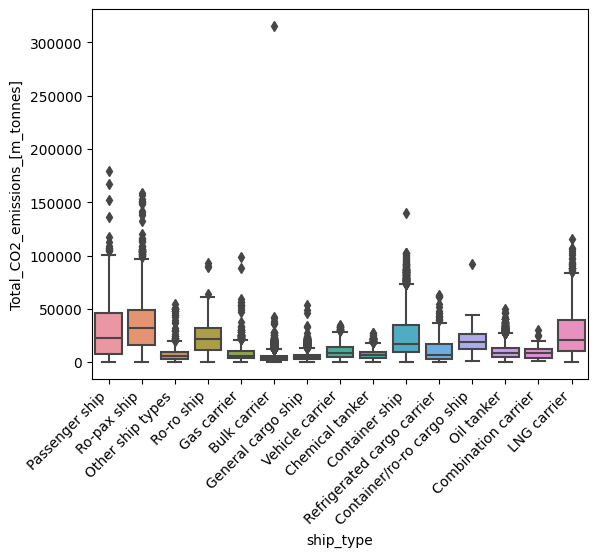

In [77]:
chart = sns.boxplot(data=df, x='ship_type',y='Total_CO2_emissions_[m_tonnes]')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.show()

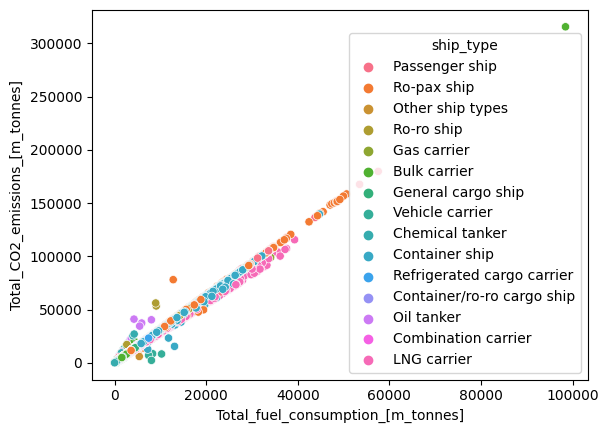

In [78]:
chart = sns.scatterplot(data=df, hue='ship_type',y='Total_CO2_emissions_[m_tonnes]' ,x='Total_fuel_consumption_[m_tonnes]')
plt.show()

In [85]:
# looking at how total emissions per ship type compare within a given year
df_co2_years = df.groupby(['ship_type','year'])['Total_CO2_emissions_[m_tonnes]'].sum().unstack()
df_co2_years_pct = df_co2_years.divide(df_co2_years.sum())*100

df_co2_years_pct.style.background_gradient().format(precision=2)

year,2018,2019,2020,2021
ship_type,,,,
Bulk carrier,12.83,11.74,11.52,12.93
Chemical tanker,6.56,6.58,7.16,7.09
Combination carrier,0.07,0.08,0.09,0.04
Container ship,31.24,30.44,32.41,32.56
Container/ro-ro cargo ship,1.16,1.04,0.98,1.05
Gas carrier,1.79,2.07,2.10,1.94
General cargo ship,4.37,4.57,4.93,4.95
LNG carrier,4.22,5.45,6.26,5.09
Oil tanker,13.12,13.67,14.64,13.04


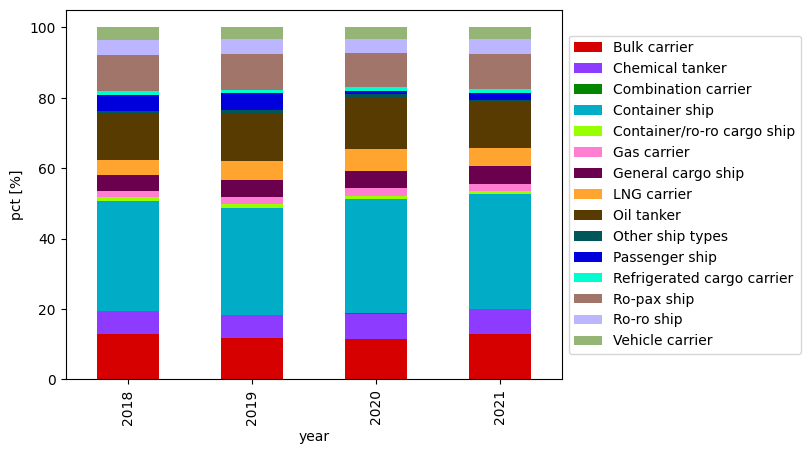

In [84]:
palette = sns.color_palette(cc.glasbey, n_colors=15)
ax = df_co2_years_pct.T.plot(kind='bar', stacked=True, color=palette)
ax.set_ylabel('pct [%]')
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# ship deadweight vs emissions intensity

In [88]:
df['ship_dwt_carried[m_tonnes]'] = df['Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]'].divide(df['Annual_average_Fuel_consumption_per_transport_work_(dwt)_[g_/_dwt_carried_·_n_miles]'])*1000

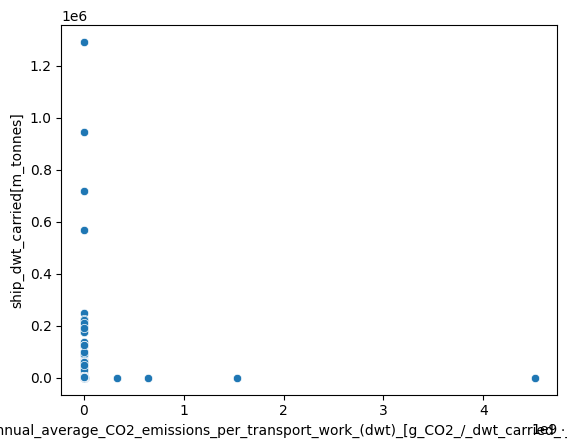

In [90]:
chart = sns.scatterplot(data=df, x='Annual_average_CO2_emissions_per_transport_work_(dwt)_[g_CO2_/_dwt_carried_·_n_miles]', y='ship_dwt_carried[m_tonnes]')
plt.show()

# distance travelled

In [18]:
df['Total_distance_travelled_[n_mile]'] = df['Total_fuel_consumption_[m_tonnes]']\
.divide(df['Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]'])*1000

/home/xavier/Desktop/emissions/emissions/.venv/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


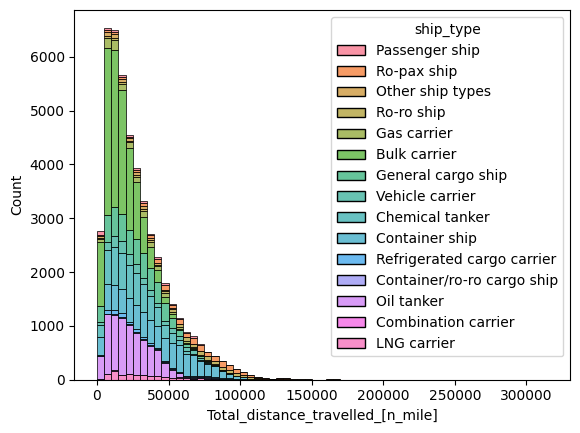

In [22]:
chart = sns.histplot(data=df, x="Total_distance_travelled_[n_mile]", binwidth=5000, hue='ship_type', multiple="stack")
plt.show()

In [49]:
df_dist = df.groupby('ship_type')['Total_distance_travelled_[n_mile]'].describe()
df_dist['sum'] = df.groupby('ship_type')['Total_distance_travelled_[n_mile]'].sum()
df_dist.style.background_gradient().format(precision=0)

,count,mean,std,min,25%,50%,75%,max,sum
ship_type,,,,,,,,,
Bulk carrier,13618,16575,10643,13,8657,14295,22110,81304,225717869
Chemical tanker,5371,26071,15447,27,13597,24032,36571,154394,140024937
Combination carrier,42,28290,19260,4698,12329,24305,37668,73187,1188192
Container ship,7171,41394,24758,28,20133,40147,60296,116361,296835685
Container/ro-ro cargo ship,290,51312,24216,1921,34423,50701,71331,107922,14880477
Gas carrier,1318,27966,20661,105,11060,23067,39137,117256,36858603
General cargo ship,4807,27555,16639,124,13528,26068,39727,127426,132455747
LNG carrier,1017,32423,22165,665,13495,26806,44881,116503,32973748
Oil tanker,7521,22998,13761,1,11557,20759,32439,91148,172967674


# distance travelled over years

In [47]:
df_dist_years = df.groupby(['ship_type','year'])['Total_distance_travelled_[n_mile]'].sum()
dist_table = df_dist_years.unstack()
dist_table.style.bar(color="#1d5f6f",height=90).format(precision=0)

year,2018,2019,2020,2021
ship_type,,,,
Bulk carrier,60110538,58192519,52986907,54427904
Chemical tanker,34339553,35620707,35482152,34582525
Combination carrier,274993,341815,363164,208221
Container ship,76601128,78705693,72750475,68778389
Container/ro-ro cargo ship,4200337,4074877,3300882,3304381
Gas carrier,9096172,9875996,9135709,8750727
General cargo ship,32517542,34377407,33347475,32213323
LNG carrier,6528790,8783237,9458568,8203153
Oil tanker,42842732,46135491,44064065,39925387


In [76]:
dist_table_pct = dist_table.pct_change(axis=1)*100
dist_table_pct.style.highlight_max(color="#1d5f6f").highlight_min(color = "#D75947").format(precision=2)

year,2018,2019,2020,2021
ship_type,,,,
Bulk carrier,nan,-3.19,-8.95,2.72
Chemical tanker,nan,3.73,-0.39,-2.54
Combination carrier,nan,24.30,6.25,-42.66
Container ship,nan,2.75,-7.57,-5.46
Container/ro-ro cargo ship,nan,-2.99,-18.99,0.11
Gas carrier,nan,8.57,-7.50,-4.21
General cargo ship,nan,5.72,-3.00,-3.40
LNG carrier,nan,34.53,7.69,-13.27
Oil tanker,nan,7.69,-4.49,-9.39
